In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

merge_table = pd.merge(city_data, ride_data, on="city", how="outer")
merge_table.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

urban_data = merge_table.loc[merge_table["type"] == "Urban"]
suburban_data = merge_table.loc[merge_table["type"] == "Suburban"]
rural_data = merge_table.loc[merge_table["type"] == "Rural"]

# merge_table

# Build the scatter plots for each city types

# Incorporate the other graph properties


In [3]:
average_fare_urban = urban_data.groupby(["city"]).mean()["fare"]
average_fare_suburban = suburban_data.groupby(["city"]).mean()["fare"]
average_fare_rural = rural_data.groupby(["city"]).mean()["fare"]
print(average_fare_urban.head(3))
print(average_fare_suburban.head(3))
print(average_fare_rural.head(3))

city
Amandaburgh    24.641667
Barajasview    25.332273
Carriemouth    28.314444
Name: fare, dtype: float64
city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Name: fare, dtype: float64
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Name: fare, dtype: float64


In [4]:
ride_count_urban = urban_data.groupby(["city"]).count()["ride_id"]
ride_count_suburban = suburban_data.groupby(["city"]).count()["ride_id"]
ride_count_rural = rural_data.groupby(["city"]).count()["ride_id"]
print(ride_count_urban.head(3))
print(ride_count_suburban.head(3))
print(ride_count_rural.head(3))

city
Amandaburgh    18
Barajasview    22
Carriemouth    27
Name: ride_id, dtype: int64
city
Barronchester    16
Bethanyland      18
Brandonfort      19
Name: ride_id, dtype: int64
city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Name: ride_id, dtype: int64


In [5]:
driver_count_urban = urban_data.groupby(["city"]).mean()["driver_count"]
driver_count_suburban = suburban_data.groupby(["city"]).mean()["driver_count"]
driver_count_rural = rural_data.groupby(["city"]).mean()["driver_count"]
print(driver_count_urban.head(3))
print(driver_count_suburban.head(3))
print(driver_count_rural.head(3))

city
Amandaburgh    12.0
Barajasview    26.0
Carriemouth    52.0
Name: driver_count, dtype: float64
city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Name: driver_count, dtype: float64
city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Name: driver_count, dtype: float64


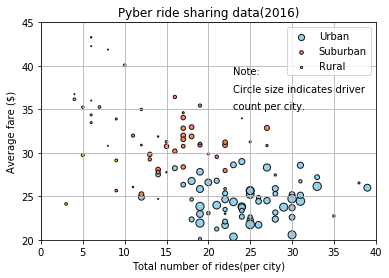

In [6]:
# Show plot
plt.scatter(ride_count_urban, average_fare_urban, s=driver_count_urban, c="skyblue", edgecolor="black", linewidths=1, marker="o",
           alpha=0.9, label="Urban") 
plt.scatter(ride_count_suburban, average_fare_suburban, s=driver_count_suburban, c="coral", edgecolor="black", linewidths=1, marker="o",
           alpha=0.9, label="Suburban") 
plt.scatter(ride_count_rural, average_fare_rural, s=driver_count_rural, c="gold", edgecolor="black", linewidths=1, marker="o",
           alpha=0.9, label="Rural") 

plt.xlim(0,40)
plt.ylim(20,45)
plt.title("Pyber ride sharing data(2016)")
plt.xlabel("Total number of rides(per city)")
plt.ylabel("Average fare ($)")
plt.legend(loc='upper right')
plt.grid()
plt.text(23, 39, "Note:", fontsize=10)
plt.text(23, 37, "Circle size indicates driver", fontsize=10)
plt.text(23, 35, "count per city.", fontsize=10)
plt.savefig('pyber_bubbleplot.png')
plt.show()

## Total Fares by City Type

In [7]:
total_fares_percent = merge_table.groupby(["type"]).sum()["fare"]
total_fares_percent

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

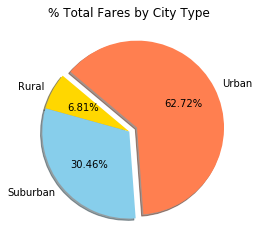

In [8]:
# Show Figure
plt.pie(total_fares_percent, labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "skyblue", "coral"],
       explode=[0, 0, 0.1],
       autopct='%1.2f%%',
       shadow=True, startangle=140)
plt.title("% Total Fares by City Type")
plt.savefig('fare_percent_pie_chart.png')
plt.show()

## Total Rides by City Type

In [9]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [10]:
total_ride_percent = merge_table.groupby(["type"]).count()["ride_id"]
total_ride_percent

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

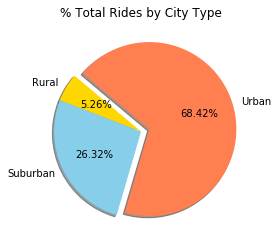

In [11]:
plt.pie(total_ride_percent, labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "skyblue", "coral"],
       explode=[0, 0, 0.1],
       autopct='%1.2f%%',
       shadow=True, startangle=140)
plt.title("% Total Rides by City Type")
plt.savefig('ride_percent_pie_chart.png')
plt.show()

## Total Drivers by City Type

In [12]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [14]:
total_driver_percent = city_data.groupby(["type"])["driver_count"].sum()
total_driver_percent

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

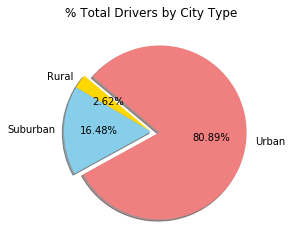

In [15]:
plt.pie(total_driver_percent, labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "skyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.2f%%',
       shadow=True, startangle=140)
plt.title("% Total Drivers by City Type")
plt.savefig('driver_percent_pie_chart.png')
plt.show()